In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

def set_mpl_params():
    matplotlib.rcdefaults()
    matplotlib.rcParams['text.usetex'] = True            # Use LaTeX for text rendering

    # Update font settings
    matplotlib.rcParams.update({
        'font.family': 'serif',                          # Use serif font family
        'font.serif': 'Palatino',                        # Use Palatino as the standard font
        'text.latex.preamble': r'\usepackage{amsmath} \usepackage{mathpazo}',  # Use the amsmath and mathpazo package for LaTeX
    })

    # Customize the figure size
    matplotlib.rcParams['figure.figsize'] = (8, 6)   # Set the default figure size

    # Customize axes
    matplotlib.rcParams['axes.labelsize'] = 24       # Axis label font size
    matplotlib.rcParams['axes.titlesize'] = 24       # Axis title font size
    matplotlib.rcParams['axes.titlepad'] = 15        # Axis title padding
    matplotlib.rcParams['axes.linewidth'] = 1.5        # Axis line width

    # Customize ticks
    matplotlib.rcParams['xtick.labelsize'] = 20      # X-axis tick label size
    matplotlib.rcParams['ytick.labelsize'] = 20      # Y-axis tick label size
    matplotlib.rcParams['xtick.major.width'] = 1.2   # X-axis major tick width
    matplotlib.rcParams['ytick.major.width'] = 1.2   # Y-axis major tick width
    matplotlib.rcParams['xtick.minor.size'] = 4      # X-axis minor tick size
    matplotlib.rcParams['ytick.minor.size'] = 4      # Y-axis minor tick size
    matplotlib.rcParams['xtick.major.size'] = 8      # X-axis major tick size
    matplotlib.rcParams['ytick.major.size'] = 8      # Y-axis major tick size

    # Customize legend
    matplotlib.rcParams['legend.fontsize'] = 20      # Legend font size
    matplotlib.rcParams['legend.frameon'] = True     # Enable/Disable the frame around the legend

    # Customize grid
    matplotlib.rcParams['grid.color'] = 'gray'       # Grid color
    matplotlib.rcParams['grid.linestyle'] = '-'      # Grid line style
    matplotlib.rcParams['grid.linewidth'] = 0.5      # Grid line width

    # Customize lines
    matplotlib.rcParams['lines.linewidth'] = 2.5       # Line width
    matplotlib.rcParams['lines.markersize'] = 10       # Marker size

    # Change figure and axes background colors
    matplotlib.rcParams['figure.facecolor'] = 'white'    # Figure background color
    matplotlib.rcParams['axes.facecolor'] = 'white'      # Axes background color
    
set_mpl_params()

In [2]:
# Extracted value for the Bulk Energy (Exercise 2, no relaxation)
E_bulk = pd.read_csv("E_bulk.dat", names=["E_bulk"])
E_bulk = E_bulk["E_bulk"].values[0] / 4
print(E_bulk, " eV")
lattice_constant = 4.082  # Angstrom
A_slab = lattice_constant**2

-2.9288913210513  eV


In [3]:
def compute_surface_energy(filename, E_bulk=E_bulk, A_slab=A_slab): 
    df = pd.read_csv(filename,  sep=" ", header=None, names=["n_layers", "n_vac", "E_slab"])
    df["N_atoms"] = 4 * df["n_layers"] 
    df["Energy per Atom"] = df["E_slab"] / df["N_atoms"]
    df["Surface Energy"] = (df["E_slab"] - df["N_atoms"] * E_bulk) / (2 * A_slab)    
    df = df.sort_values(by=["n_layers", "n_vac"]).reset_index(drop=True)
    df.drop_duplicates(subset=["n_layers", "n_vac"], inplace=True)
    return df

In [4]:
df_no_relax = compute_surface_energy("E_slab.dat") 

# Only keep n_layers <= 8 and n_vac <= 8
df_no_relax = df_no_relax[(df_no_relax["n_layers"] <= 8) & (df_no_relax["n_vac"] <= 8)]

# set precision to :.14f
pd.options.display.float_format = '{:.14f}'.format
display(df_no_relax.head(20))

# print n_layers, nvac = 1,2 and 2,1

for x in range(1, 9):
    for y in range(x, 9):
        print(x, y, np.abs(df_no_relax[(df_no_relax["n_layers"] == x) & (df_no_relax["n_vac"] == y)]["Surface Energy"].values[0] - df_no_relax[(df_no_relax["n_layers"] == y) & (df_no_relax["n_vac"] == x)]["Surface Energy"].values[0]))

,n_layers,n_vac,E_slab,N_atoms,Energy per Atom,Surface Energy
0,1,1,-7.08544854333514,4,-1.77136213583378,0.13893636901356
1,1,2,-6.89350757668250,4,-1.72337689417062,0.14469596050210
2,1,3,-6.86780586399872,4,-1.71695146599968,0.14546719432568
3,1,4,-6.86189541580161,4,-1.71547385395040,0.14564454972679
4,1,5,-6.86144068961418,4,-1.71536017240354,0.14565819474028
5,1,6,-6.86144068961418,4,-1.71536017240354,0.14565819474028
6,1,7,-6.86144068961418,4,-1.71536017240354,0.14565819474028
7,1,8,-6.86144068961418,4,-1.71536017240354,0.14565819474028
8,2,1,-18.60907286088770,8,-2.32613410761096,0.14469596050210
9,2,2,-18.36572846886740,8,-2.29571605860842,0.15199801963782


1 1 0.0
1 2 2.7755575615628914e-17
1 3 1.865174681370263e-14
1 4 3.0531133177191805e-16
1 5 2.3592239273284576e-15
1 6 4.54081217071689e-14
1 7 1.0252909632413321e-13
1 8 1.775801727887938e-13
2 2 0.0
2 3 9.048317650695026e-15
2 4 2.9976021664879227e-15
2 5 2.9976021664879227e-15
2 6 0.0
2 7 6.608602554081244e-14
2 8 1.2323475573339238e-13
3 3 0.0
3 4 5.9674487573602164e-15
3 5 1.790234627208065e-14
3 6 6.189493362285248e-15
3 7 3.605449272470196e-14
3 8 8.124056982694583e-14
4 4 0.0
4 5 1.4932499681208355e-14
4 6 6.189493362285248e-15
4 7 1.5126788710517758e-14
4 8 6.886158310237533e-14
5 5 0.0
5 6 1.942890293094024e-16
5 7 3.3056890558214036e-14
5 8 7.485678743535118e-14
6 6 0.0
6 7 2.6867397195928788e-14
6 8 9.936496070395151e-14
7 7 0.0
7 8 5.0737192225369654e-14
8 8 0.0


In [5]:
pivot_df_no_relax = df_no_relax.pivot(index="n_vac", columns="n_layers", values="Surface Energy")

# print up to :15f 
pd.options.display.float_format = '{:.20f}'.format
display(pivot_df_no_relax)

n_layers,1,2,3,4,5,6,7,8
n_vac,,,,,,,,
1,0.13893636901355566060,0.14469596050209737603,0.14546719432570273667,0.14564454972679138911,0.14565819474028074421,0.14565819474023297686,0.14565819474017585589,0.14565819474010080481
2,0.14469596050209740379,0.15199801963781556235,0.15313760927711464466,0.15334225470518808576,0.15335589971867447101,0.15335589971867147341,0.15335589971860538738,0.15335589971854823865
3,0.14546719432568408492,0.15313760927710559634,0.15430448894337445154,0.15450913437144797591,0.15452277938495823095,0.15452277938493413911,0.15452277938490130427,0.15452277938485908804
4,0.14564454972679108380,0.15334225470518508816,0.15450913437145394336,0.15471377979953934712,0.15472742481304063711,0.15472742481303489170,0.15472742481301057782,0.15472742481295684303
5,0.14565819474027838498,0.15335589971867147341,0.15452277938494032861,0.15472742481302570461,0.15474106982652702236,0.15474106982652721665,0.15474106982649396547,0.15474106982645216557
6,0.14565819474027838498,0.15335589971867147341,0.15452277938494032861,0.15472742481302870221,0.15474106982652702236,0.15474106982652124920,0.15474106982650034925,0.15474106982642188424
7,0.14565819474027838498,0.15335589971867147341,0.15452277938493735876,0.15472742481302570461,0.15474106982652702236,0.15474106982652721665,0.15474106982649396547,0.15474106982644619812
8,0.14565819474027838498,0.15335589971867147341,0.15452277938494032861,0.15472742481302570461,0.15474106982652702236,0.15474106982652124920,0.15474106982649693531,0.15474106982645216557


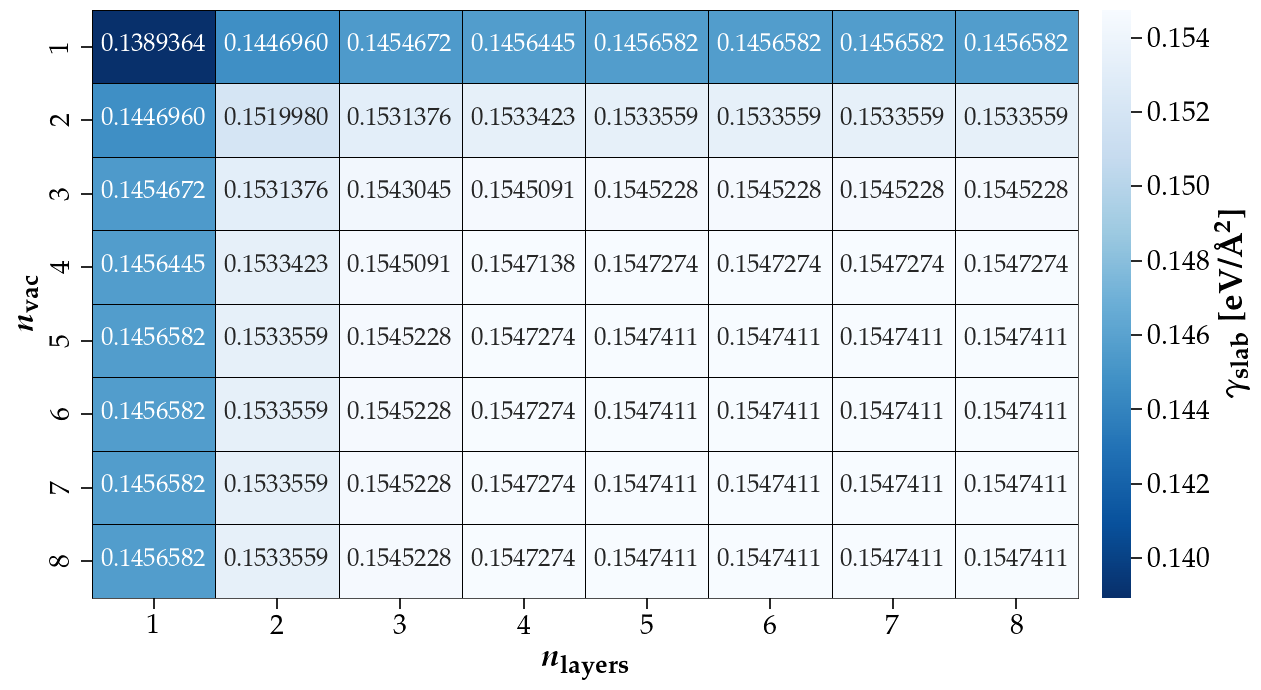

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.cm as cm

# Define colormap
cmap = sns.color_palette("Blues", as_cmap=True).reversed()

plt.figure(figsize=(13,7))

# Create heatmap
ax = sns.heatmap(pivot_df_no_relax, annot=True, fmt=".7f", 
                 annot_kws={"size": 18, "weight": "bold"},
                 cmap=cmap, linewidths=0.5, linecolor="black",
                 cbar_kws={"label": r"$\boldsymbol{\gamma_{\rm slab}}$ \textbf{[eV/\AA$^{\mathbf{2}}$]}", "pad": 0.02})

for _, spine in ax.spines.items():
    spine.set_visible(True)  # Ensure all borders are shown
    spine.set_linewidth(0.5)   # Adjust thickness

plt.xlabel(r"$\boldsymbol{n_{\rm layers}}$", fontsize=24)
plt.ylabel(r"$\boldsymbol{n_{\rm vac}}$", fontsize=24)

plt.tight_layout()
plt.savefig("Figures/SurfaceEnergy_no_relax.pdf", bbox_inches="tight")
plt.show()


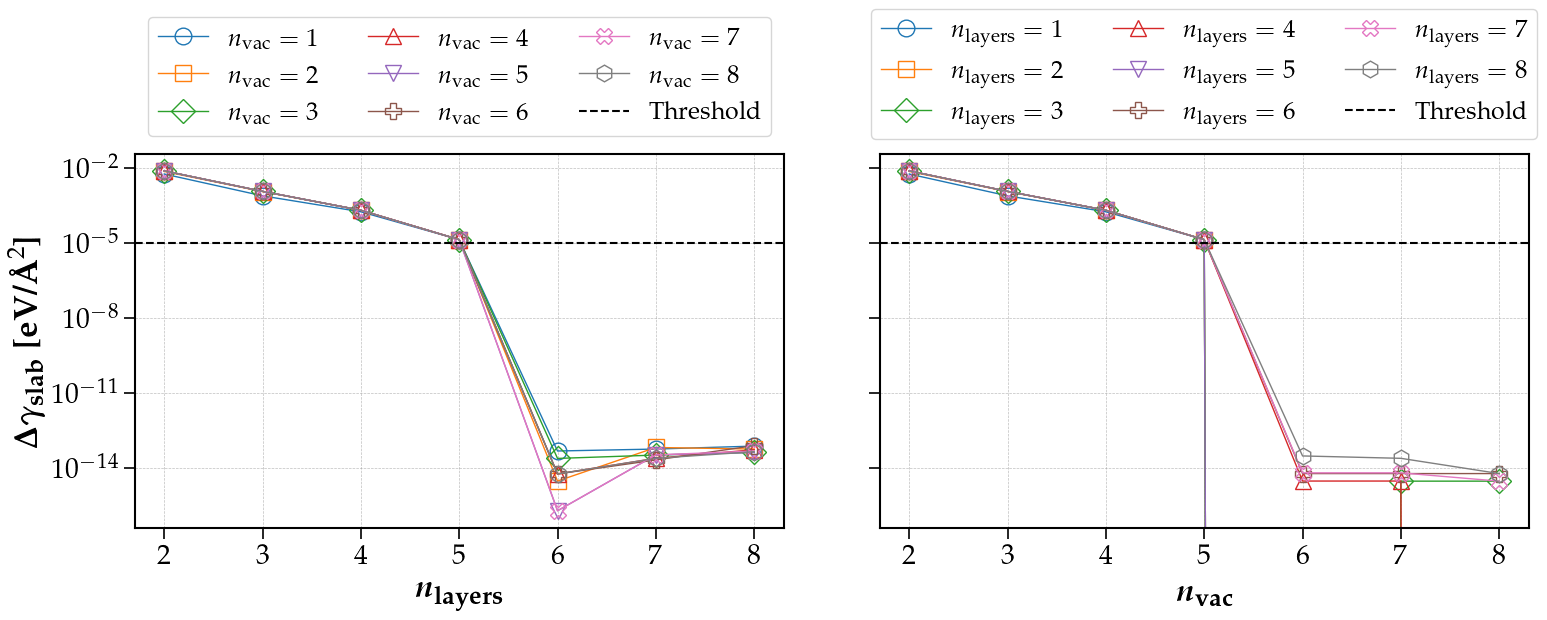

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

markers = ["o", "s", "D", "^", "v", "P", "X", "h"]
threshold = 1e-5

fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

# Left plot: Convergence w.r.t n_layers
ax = axes[0]
for n, m in zip(range(1, 9), markers):
    df_n = df_no_relax[df_no_relax["n_vac"] == n].copy()
    df_n["error"] = df_n["Surface Energy"].diff().abs()
    ax.semilogy(df_n["n_layers"], df_n["error"], marker=m, label=rf"$n_{{\rm vac}} = {n}$", 
                 linewidth=1, markersize=12, markerfacecolor="None", linestyle="-")

ax.axhline(threshold, color="black", linestyle="--", label="Threshold", linewidth=1.5)
ax.set_xlabel(r"$\boldsymbol{n_{\rm layers}}$", fontsize=24)
ax.set_ylabel(r"$\boldsymbol{\Delta\gamma_{\rm slab}}$ \textbf{[eV/\AA$^2$]}", fontsize=24)
ax.grid(True, which="both", ls="--", alpha=0.5)

# Right plot: Convergence w.r.t n_vac
ax = axes[1]
for n, m in zip(range(1, 9), markers):
    df_n = df_no_relax[df_no_relax["n_layers"] == n].copy()
    df_n["error"] = df_n["Surface Energy"].diff().abs()
    ax.semilogy(df_n["n_vac"], df_n["error"], marker=m, label=rf"$n_{{\rm layers}} = {n}$", 
                 linewidth=1, markersize=12, markerfacecolor="None", linestyle="-")

ax.axhline(threshold, color="black", linestyle="--", linewidth=1.5, label="Threshold")
ax.set_xlabel(r"$\boldsymbol{n_{\rm vac}}$", fontsize=24)
# ax.set_ylabel(r"$\boldsymbol{\Delta\gamma_{\rm slab}}$ \textbf{[eV/\AA$^2$]}", fontsize=18)
ax.grid(True, which="both", ls="--", alpha=0.5)

axes[0].legend(fontsize=18, loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.40))
axes[1].legend(fontsize=18, loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.42))

plt.tight_layout()
plt.savefig("Figures/Convergence_n_layers_n_vac.pdf", bbox_inches="tight")
plt.show()


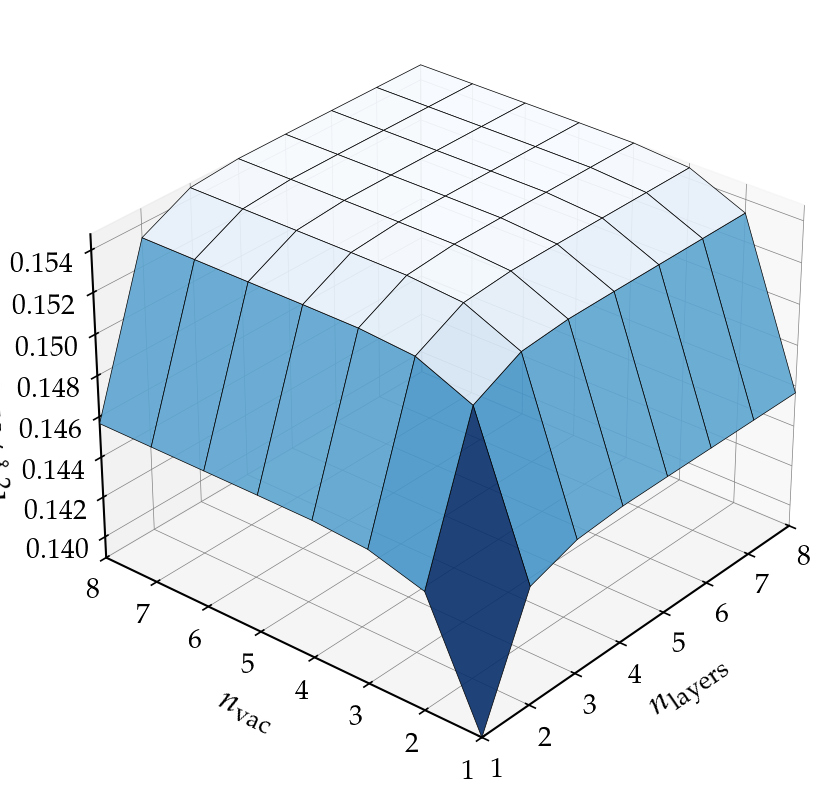

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Meshgrid pour X, Y
X, Y = np.meshgrid(pivot_df_no_relax.columns, pivot_df_no_relax.index)
Z = pivot_df_no_relax.values

# Création de la figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot de la surface
ax.plot_surface(X, Y, Z, cmap=cmap, edgecolor='k', linewidth=0.5, alpha=0.9, antialiased=True)

# Ajuster la vue pour améliorer la lisibilité
ax.view_init(elev=30, azim=220)  # Modifier l'élévation et l'azimut si nécessaire

ax.tick_params(axis='z', pad=12)  # Décale les ticks pour ne pas être collés à la boîte
ax.set_zlabel(r"$\gamma_{\rm slab}$ [eV/\AA$^2$]", fontsize=24, labelpad=25)  # Augmenter labelpad

ax.set_xlabel(r"$n_{\rm layers}$", fontsize=24, labelpad=15)
ax.set_ylabel(r"$n_{\rm vac}$", fontsize=24, labelpad=15)

ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())

# Sauvegarde et affichage
plt.tight_layout(h_pad=0, w_pad=0.5)
plt.savefig("Figures/SurfaceEnergy_no_relax_3D.pdf")
plt.show()


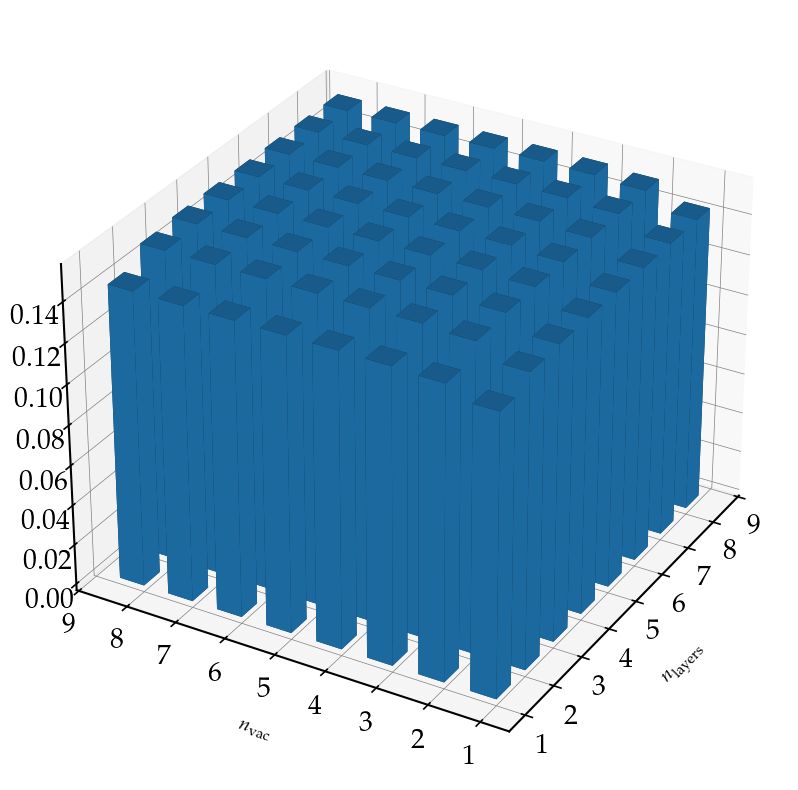

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Generate X, Y grid
X, Y = np.meshgrid(pivot_df_no_relax.columns, pivot_df_no_relax.index)

# Flatten the arrays for bar3d
X_flat = X.flatten()
Y_flat = Y.flatten()
Z_flat = pivot_df_no_relax.values.flatten()

# Bar width
dx = dy = 0.5  # Adjust the width of bars

# Create the figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D bars
ax.bar3d(X_flat, Y_flat, np.zeros_like(Z_flat), dx, dy, Z_flat, cmap='viridis', shade=True)

# Labels
ax.set_xlabel(r"$n_{\rm layers}$", fontsize=14, labelpad=15)
ax.set_ylabel(r"$n_{\rm vac}$", fontsize=14, labelpad=15)
ax.set_zlabel("Surface Energy (eV)", fontsize=14, labelpad=15)

# Rotate view for better visibility
ax.view_init(elev=30, azim=210)  # Change angles as needed

# Show plot
plt.tight_layout()
plt.savefig("Figures/SurfaceEnergy_no_relax_3D_barplot.pdf")
plt.show()


In [12]:
# Compute surface energy differences for fixed n_vac
df_no_relax["Surface Energy Difference"] = df_no_relax.groupby("n_vac")["Surface Energy"].diff()
df_no_relax["Surface Energy Difference"] = df_no_relax["Surface Energy Difference"].fillna(0)
df_no_relax["Surface Energy Difference"] = df_no_relax["Surface Energy Difference"].map(lambda x: f"{x:.2e}")
pivot_df_no_relax_diff = df_no_relax.pivot(index="n_vac", columns="n_layers", values="Surface Energy Difference")
display(pivot_df_no_relax_diff)

# Compute the surface energy differences for fixed n_layers
df_no_relax["Surface Energy Difference"] = df_no_relax.groupby("n_layers")["Surface Energy"].diff()
df_no_relax["Surface Energy Difference"] = df_no_relax["Surface Energy Difference"].fillna(0)
df_no_relax["Surface Energy Difference"] = df_no_relax["Surface Energy Difference"].map(lambda x: f"{x:.2e}")
pivot_df_no_relax_diff = df_no_relax.pivot(index="n_layers", columns="n_vac", values="Surface Energy Difference")
display(pivot_df_no_relax_diff)

n_layers,1,2,3,4,5,6,7,8
n_vac,,,,,,,,
1,0.00e+00,5.76e-03,7.71e-04,1.77e-04,1.36e-05,-4.78e-14,-5.71e-14,-7.51e-14
2,0.00e+00,7.30e-03,1.14e-03,2.05e-04,1.36e-05,-3.00e-15,-6.61e-14,-5.71e-14
3,0.00e+00,7.67e-03,1.17e-03,2.05e-04,1.36e-05,-2.41e-14,-3.28e-14,-4.22e-14
4,0.00e+00,7.70e-03,1.17e-03,2.05e-04,1.36e-05,-5.75e-15,-2.43e-14,-5.37e-14
5,0.00e+00,7.70e-03,1.17e-03,2.05e-04,1.36e-05,1.94e-16,-3.33e-14,-4.18e-14
6,0.00e+00,7.70e-03,1.17e-03,2.05e-04,1.36e-05,-5.77e-15,-2.09e-14,-7.85e-14
7,0.00e+00,7.70e-03,1.17e-03,2.05e-04,1.36e-05,1.94e-16,-3.33e-14,-4.78e-14
8,0.00e+00,7.70e-03,1.17e-03,2.05e-04,1.36e-05,-5.77e-15,-2.43e-14,-4.48e-14


n_vac,1,2,3,4,5,6,7,8
n_layers,,,,,,,,
1,0.00e+00,5.76e-03,7.71e-04,1.77e-04,1.36e-05,0.00e+00,0.00e+00,0.00e+00
2,0.00e+00,7.30e-03,1.14e-03,2.05e-04,1.36e-05,0.00e+00,0.00e+00,0.00e+00
3,0.00e+00,7.67e-03,1.17e-03,2.05e-04,1.36e-05,0.00e+00,-2.97e-15,2.97e-15
4,0.00e+00,7.70e-03,1.17e-03,2.05e-04,1.36e-05,3.00e-15,-3.00e-15,0.00e+00
5,0.00e+00,7.70e-03,1.17e-03,2.05e-04,1.36e-05,0.00e+00,0.00e+00,0.00e+00
6,0.00e+00,7.70e-03,1.17e-03,2.05e-04,1.36e-05,-5.97e-15,5.97e-15,-5.97e-15
7,0.00e+00,7.70e-03,1.17e-03,2.05e-04,1.36e-05,6.38e-15,-6.38e-15,2.97e-15
8,0.00e+00,7.70e-03,1.17e-03,2.05e-04,1.36e-05,-3.03e-14,2.43e-14,5.97e-15


In [67]:
2**(1/6) * 2.648

2.97227950392322

In [13]:
# Convergence in the number of vacuum layers | E_n+1 - E_n |
df_no_relax["E_diff"] = df_no_relax.groupby("n_layers")["E_slab"].diff()
df_no_relax["E_diff"] = df_no_relax["E_diff"].abs()
df_no_relax["E_diff"] = df_no_relax["E_diff"].fillna(0)

n_layers,1,2,3,4,5,6,7,8,9,10,11,12
n_vac,,,,,,,,,,,,
1,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
2,0.1919409667,0.2433443920,0.2556200146,0.2565294670,0.2565294670,0.2565294670,0.2565294670,0.2565294670,0.2565294670,0.2565294670,0.2565294670,0.2565294670
3,0.0257017127,0.0379773353,0.0388867876,0.0388867876,0.0388867876,0.0388867876,0.0388867876,0.0388867876,0.0388867876,0.0388867876,0.0388867876,0.0388867876
4,0.0059104482,0.0068199006,0.0068199006,0.0068199006,0.0068199006,0.0068199006,0.0068199006,0.0068199006,0.0068199006,0.0068199006,0.0068199006,0.0068199006
5,0.0004547262,0.0004547262,0.0004547262,0.0004547262,0.0004547262,0.0004547262,0.0004547262,0.0004547262,0.0004547262,0.0004547262,0.0004547262,0.0004547262
6,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
7,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000


In [10]:
df_relax = compute_surface_energy("E_slab_relax.dat")
display(df_relax)

,n_layers,n_vac,E_slab,N_atoms,Surface Energy
0,12,0,-138.1719342316,48,-0.0000618816
1,12,1,-133.4827133676,48,0.1406480307
2,12,2,-133.3297675342,48,0.1452374914
3,12,4,-133.3297675342,48,0.1452374914
4,12,6,-133.3297675342,48,0.1452374914
5,12,8,-133.3297675342,48,0.1452374914
6,12,10,-133.3297675342,48,0.1452374914
7,12,12,-133.3297675342,48,0.1452374914
8,12,14,-133.3297675342,48,0.1452374914
9,100,1,-1146.7435579305,400,0.1401944265


n_layers,12,100
n_vac,,
1,0.1406480307,0.1401944265
2,0.1452374914,0.1447838578
4,0.1452374914,0.1447838578
6,0.1452374914,NaN
8,0.1452374914,NaN
10,0.1452374914,NaN
12,0.1452374914,NaN
14,0.1452374914,NaN


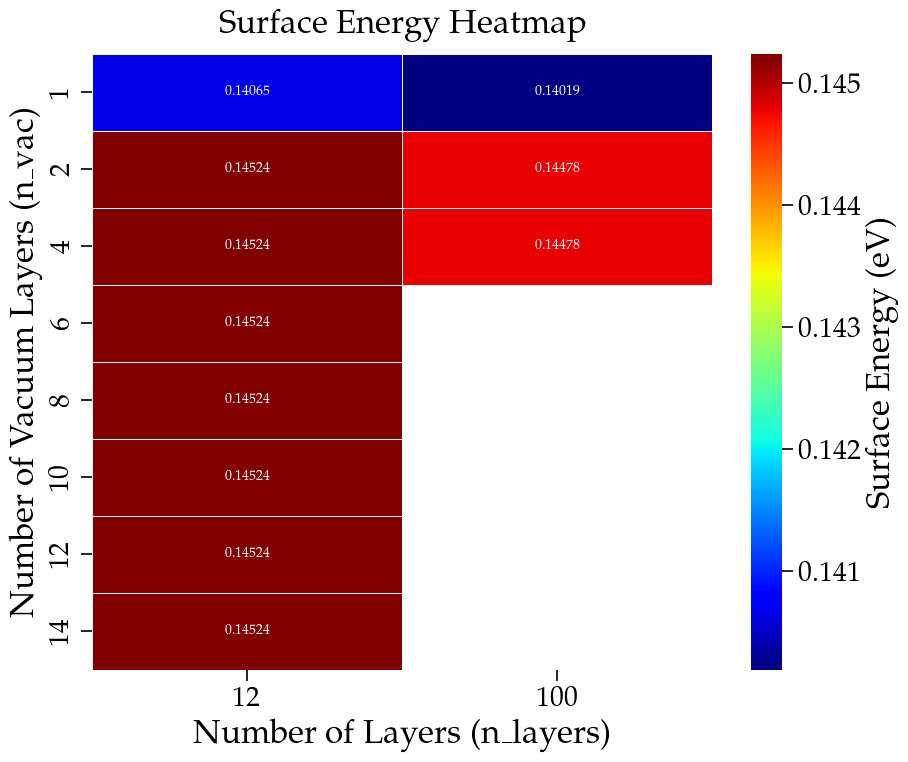

In [ ]:
pivot_df_relax = df_relax.pivot(index="n_vac", columns="n_layers", values="Surface Energy")

# drop row with n_vac=0
pivot_df_relax = pivot_df_relax.drop(0)
display(pivot_df_relax)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df_relax, annot=True, fmt=".5f", cmap="jet", linewidths=0.5, cbar_kws={'label': 'Surface Energy (eV)'})
plt.xlabel("Number of Layers (n_layers)")
plt.ylabel("Number of Vacuum Layers (n_vac)")
plt.title("Surface Energy Heatmap")
plt.show()

In [37]:
E_s = 1275.21 * 1e-7  # J/cm^2

J = 1 / 1.602176634e-19
cm = 1e8

conversion = J / cm**2

print(f"Surface energy {E_s * conversion:.15f} eV/angstrom^2")

Surface energy 0.079592347868431 eV/angstrom^2


In [14]:
for n_vac in range(1, 8): 
    for n_layer in range(15, 30):
        %run create_slab.py Ag 4.082 {n_layer} {n_vac}

Lattice vectors:
 4.082000 0.000000 0.000000
0.000000 4.082000 0.000000
0.000000 0.000000 65.312000
Atomic positions (fractional):
 [[0.      0.      0.     ]
 [0.5     0.5     0.     ]
 [0.      0.5     0.03125]
 [0.5     0.      0.03125]
 [0.      0.      0.0625 ]
 [0.5     0.5     0.0625 ]
 [0.      0.5     0.09375]
 [0.5     0.      0.09375]
 [0.      0.      0.125  ]
 [0.5     0.5     0.125  ]
 [0.      0.5     0.15625]
 [0.5     0.      0.15625]
 [0.      0.      0.1875 ]
 [0.5     0.5     0.1875 ]
 [0.      0.5     0.21875]
 [0.5     0.      0.21875]
 [0.      0.      0.25   ]
 [0.5     0.5     0.25   ]
 [0.      0.5     0.28125]
 [0.5     0.      0.28125]
 [0.      0.      0.3125 ]
 [0.5     0.5     0.3125 ]
 [0.      0.5     0.34375]
 [0.5     0.      0.34375]
 [0.      0.      0.375  ]
 [0.5     0.5     0.375  ]
 [0.      0.5     0.40625]
 [0.5     0.      0.40625]
 [0.      0.      0.4375 ]
 [0.5     0.5     0.4375 ]
 [0.      0.5     0.46875]
 [0.5     0.      0.46875]
 [0.

In [23]:
nlayers = [25, 30, 40, 50, 60, 70, 80, 90]

for n in nlayers:
    %run create_slab.py Ag 4.082 {n} 7

Lattice vectors:
 4.082000 0.000000 0.000000
0.000000 4.082000 0.000000
0.000000 0.000000 130.624000
Atomic positions (fractional):
 [[0.       0.       0.      ]
 [0.5      0.5      0.      ]
 [0.       0.5      0.015625]
 [0.5      0.       0.015625]
 [0.       0.       0.03125 ]
 [0.5      0.5      0.03125 ]
 [0.       0.5      0.046875]
 [0.5      0.       0.046875]
 [0.       0.       0.0625  ]
 [0.5      0.5      0.0625  ]
 [0.       0.5      0.078125]
 [0.5      0.       0.078125]
 [0.       0.       0.09375 ]
 [0.5      0.5      0.09375 ]
 [0.       0.5      0.109375]
 [0.5      0.       0.109375]
 [0.       0.       0.125   ]
 [0.5      0.5      0.125   ]
 [0.       0.5      0.140625]
 [0.5      0.       0.140625]
 [0.       0.       0.15625 ]
 [0.5      0.5      0.15625 ]
 [0.       0.5      0.171875]
 [0.5      0.       0.171875]
 [0.       0.       0.1875  ]
 [0.5      0.5      0.1875  ]
 [0.       0.5      0.203125]
 [0.5      0.       0.203125]
 [0.       0.       0.21875